In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False

import copy

from sklearn.linear_model import LinearRegression

# Data

학생 1인당 월평균 사교육비 (17개 시도별)

In [2]:
in_e = pd.read_csv('data/학교급_및_시도별__학생_1인당_월평균_사교육비_E.csv', encoding='cp949')
in_m = pd.read_csv('data/학교급_및_시도별__학생_1인당_월평균_사교육비_M.csv', encoding='cp949')
in_h = pd.read_csv('data/학교급_및_시도별__학생_1인당_월평균_사교육비_H.csv', encoding='cp949')

in_e = in_e.T.rename(columns=in_e.T.iloc[0]).drop(in_e.T.index[0]).drop(['시도별', '전 체'], axis=1)
in_m = in_m.T.rename(columns=in_m.T.iloc[0]).drop(in_m.T.index[0]).drop(['시도별', '전 체'], axis=1)
in_h = in_h.T.rename(columns=in_h.T.iloc[0]).drop(in_h.T.index[0]).drop(['시도별', '전 체'], axis=1)

in_e.index = in_e.index.astype(int)
in_e = in_e.astype('float')
in_m.index = in_m.index.astype(int)
in_m = in_m.astype('float')
in_h.index = in_h.index.astype(int)
in_h = in_h.astype('float')

In [45]:
in_e

,서 울,부 산,대 구,인 천,광 주,대 전,울 산,세 종,경 기,강 원,충 북,충 남,전 북,전 남,경 북,경 남,제 주
2014,30.0,20.1,22.1,20.4,23.6,26.1,21.2,18.4,24.5,16.1,20.4,21.7,17.9,16.3,20.3,20.6,21.8
2015,29.6,20.9,21.8,20.3,23.3,25.3,20.5,19.1,24.6,16.6,20.7,21.6,18.2,16.3,20.0,20.2,21.2
2016,29.9,23.7,25.4,23.5,22.6,25.3,23.6,24.2,25.9,18.6,20.6,19.2,19.5,14.5,21.6,20.4,22.8
2017,34.1,23.7,28.4,25.2,23.9,28.3,21.7,23.9,26.8,19.5,18.3,19.1,18.8,15.5,20.3,21.7,21.2
2018,36.5,24.1,27.7,24.5,25.2,24.0,25.1,26.2,28.2,18.9,22.5,17.7,19.6,19.1,20.4,22.3,21.5
2019,38.5,28.8,29.5,27.8,24.3,27.9,24.8,30.6,33.2,22.5,23.9,21.6,20.4,15.1,21.4,23.2,22.8
2020,35.1,21.1,21.3,24.3,26.3,22.7,19.7,24.5,23.5,20.9,19.0,16.4,18.5,16.0,16.5,20.2,25.2
2021,47.3,32.8,37.4,29.8,27.4,34.1,26.7,33.1,34.6,24.6,27.9,23.3,23.9,22.4,26.4,24.9,27.0
2022,53.6,35.1,40.4,35.1,31.0,37.0,35.4,37.7,40.1,28.8,30.0,25.9,26.6,25.1,28.4,28.6,28.5


In [43]:
in_e.to_csv('지역별_월평균_1인당_사교육비_초.csv')
in_m.to_csv('지역별_월평균_1인당_사교육비_중.csv')
in_h.to_csv('지역별_월평균_1인당_사교육비_고.csv')

지역별 학생 1인당 월 평균 사교육비 (일반교과)

In [4]:
df = pd.read_csv('data/지역별_학생_1인당_월평균_사교육비_20230809143756.csv', encoding='cp949', index_col=0)
df.columns = [x.replace(' ', '') for x in df.columns]
df.index.name = None

In [5]:
def divide_data(df, s):
    df_s = copy.deepcopy(df)
    target_col = s
    filtered = [col for col in df_s.columns if target_col in col]
    df_s = df_s[filtered]
    df_s = df_s.rename(columns = df_s[filtered].iloc[0]).drop(df_s.index[0])
    df_s.columns = [x.replace('(만원)', '') for x in df_s.columns]
    df_s.index = df_s.index.astype(int)
    df_s = df_s.astype('float')
    return df_s

In [62]:
how

['개인과외', '그룹과외', '학원수강', '방문학습지', '유료인터넷및통신강좌등']

In [63]:
kor = divide_data(df, '국어')
en = divide_data(df, '영어')
math = divide_data(df, '수학')
sosc = divide_data(df, '사회과학')
essay = divide_data(df, '논술')

indi = divide_data(df, '개인과외')
gro = divide_data(df, '그룹과외')
aca = divide_data(df, '학원수강')
visi = divide_data(df, '방문학습지')
inter = divide_data(df, '유료인터넷및통신강좌등')

In [7]:
subjects = ['국어', '영어', '수학', '사회과학', '논술']

for col in subjects:
    print(col)
    display(divide_data(df, col))

국어


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,2.5,3.1,2.0,2.1,2.2,1.6
2008,2.4,3.2,1.9,2.1,2.2,1.7
2009,2.4,3.1,2.0,2.0,2.1,1.7
2010,2.4,2.9,2.0,1.9,2.0,1.7
2011,2.1,2.7,1.7,1.7,1.7,1.5
2012,1.9,2.4,1.5,1.6,1.7,1.3
2013,1.8,2.3,1.5,1.5,1.5,1.4
2014,1.7,2.3,1.3,1.3,1.4,1.2
2015,1.7,2.3,1.3,1.3,1.4,1.0
2016,1.9,2.5,1.5,1.4,1.5,1.2


영어


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,7.6,8.8,6.8,6.1,7.1,3.0
2008,8.4,9.5,7.6,7.0,8.2,3.3
2009,8.8,10.8,7.4,7.5,8.5,4.6
2010,8.8,10.5,7.6,7.5,8.4,4.9
2011,8.8,10.8,7.4,7.5,8.5,4.9
2012,8.8,10.1,8.0,7.4,8.1,4.7
2013,9.4,11.3,8.1,7.2,8.2,4.3
2014,9.3,11.2,8.0,7.3,8.2,4.7
2015,9.1,11.2,7.7,7.2,7.9,4.8
2016,8.9,10.7,7.6,7.1,7.8,4.7


수학


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,6.7,7.9,5.8,5.0,5.6,2.8
2008,7.0,8.2,6.3,5.6,6.4,3.1
2009,7.7,9.1,6.7,5.9,6.8,3.6
2010,7.8,9.1,6.9,6.1,6.9,3.9
2011,8.1,9.6,7.0,6.3,7.1,4.0
2012,8.6,10.4,7.4,6.6,7.3,4.1
2013,8.7,10.4,7.5,6.5,7.2,4.3
2014,8.9,10.8,7.6,6.7,7.5,4.6
2015,8.8,10.6,7.5,6.9,7.4,5.0
2016,8.9,10.8,7.7,6.7,7.2,4.7


사회과학


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,1.7,1.9,1.6,1.5,1.7,1.1
2008,1.6,1.9,1.5,1.4,1.6,1.0
2009,1.7,2.1,1.5,1.5,1.6,1.3
2010,1.5,1.7,1.4,1.4,1.5,1.1
2011,1.4,1.7,1.2,1.2,1.2,1.2
2012,1.3,1.7,1.0,1.0,1.1,0.8
2013,1.0,1.1,0.9,0.9,0.9,0.8
2014,1.0,1.2,0.9,0.8,0.8,0.8
2015,1.0,1.3,0.9,0.8,0.9,0.7
2016,1.2,1.6,1.0,0.9,0.9,0.7


논술


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,1.0,1.2,0.8,0.7,0.8,0.3
2008,0.8,0.9,0.7,0.5,0.6,0.2
2009,0.7,0.9,0.6,0.5,0.6,0.4
2010,0.7,0.9,0.6,0.6,0.6,0.4
2011,0.8,1.0,0.6,0.6,0.7,0.4
2012,0.8,1.1,0.6,0.6,0.7,0.2
2013,0.9,1.3,0.7,0.6,0.7,0.3
2014,0.7,1.0,0.6,0.6,0.7,0.3
2015,0.8,1.1,0.6,0.6,0.7,0.3
2016,0.9,1.2,0.7,0.7,0.8,0.4


지역별 학생 1인당 월 평균 사교육비 (학습 방법)

In [8]:
how = ['개인과외', '그룹과외', '학원수강', '방문학습지', '유료인터넷및통신강좌등']

for col in how:
    print(col)
    display(divide_data(df, col))

개인과외


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,3.2,4.2,2.5,2.4,2.8,1.0
2008,3.3,4.3,2.6,2.5,3.0,1.2
2009,4.0,5.3,3.2,2.8,3.2,1.5
2010,3.9,4.9,3.1,2.7,3.1,1.6
2011,4.0,5.4,3.0,2.9,3.3,1.7
2012,4.0,4.8,3.5,2.8,3.2,1.6
2013,3.9,4.9,3.3,2.8,3.2,1.7
2014,4.0,4.8,3.6,2.7,3.0,1.7
2015,4.0,4.9,3.5,2.9,3.2,2.1
2016,3.7,4.2,3.3,2.7,2.9,2.0


그룹과외


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,2.1,2.1,2.1,1.8,2.1,1.0
2008,1.9,1.9,1.9,1.8,2.0,1.1
2009,2.1,2.0,2.1,2.1,2.3,1.7
2010,2.1,2.1,2.1,2.3,2.5,1.7
2011,2.1,2.2,2.1,2.2,2.3,1.8
2012,2.3,2.4,2.2,2.2,2.4,1.8
2013,2.2,2.1,2.2,2.1,2.4,1.5
2014,2.1,2.1,2.1,2.2,2.4,1.6
2015,2.2,2.2,2.2,2.2,2.3,1.9
2016,1.8,1.8,1.8,2.0,2.1,1.7


학원수강


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,12.6,14.9,11.0,9.5,10.8,5.4
2008,13.6,16.0,12.0,10.8,12.4,5.8
2009,13.7,17.1,11.4,11.0,12.5,7.1
2010,13.8,16.5,11.9,11.0,12.4,7.4
2011,13.9,17.0,11.8,11.0,12.4,7.2
2012,14.1,17.6,11.7,11.1,12.3,6.8
2013,14.8,18.5,12.3,10.7,11.9,7.1
2014,14.6,18.6,11.9,10.8,12.1,7.2
2015,14.3,18.4,11.5,10.7,11.8,6.9
2016,15.1,19.5,12.1,10.9,12.0,6.9


방문학습지


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,2.0,2.0,2.1,2.0,2.1,1.6
2008,1.8,1.8,1.9,1.8,1.8,1.4
2009,1.7,1.9,1.6,1.7,1.8,1.5
2010,1.5,1.7,1.4,1.6,1.6,1.4
2011,1.3,1.5,1.2,1.3,1.4,1.3
2012,1.1,1.1,1.1,1.1,1.1,1.0
2013,1.0,1.1,0.9,1.1,1.1,0.9
2014,1.0,1.1,0.9,1.1,1.1,1.0
2015,1.0,1.1,0.9,1.1,1.1,1.0
2016,1.0,1.0,1.0,1.1,1.1,1.0


유료인터넷및통신강좌등


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,0.2,0.3,0.2,0.2,0.2,0.2
2008,0.3,0.3,0.2,0.2,0.3,0.2
2009,0.3,0.4,0.3,0.3,0.3,0.2
2010,0.3,0.3,0.3,0.3,0.3,0.2
2011,0.3,0.3,0.3,0.3,0.3,0.2
2012,0.2,0.2,0.3,0.2,0.3,0.2
2013,0.2,0.2,0.2,0.2,0.2,0.2
2014,0.2,0.2,0.2,0.2,0.2,0.2
2015,0.2,0.2,0.2,0.2,0.2,0.2
2016,0.5,0.5,0.4,0.4,0.4,0.4


# Regplot

학생 1인당 월평균 초, 중, 고 사교육비 (17개 시도별)

In [9]:
kor

,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,2.5,3.1,2.0,2.1,2.2,1.6
2008,2.4,3.2,1.9,2.1,2.2,1.7
2009,2.4,3.1,2.0,2.0,2.1,1.7
2010,2.4,2.9,2.0,1.9,2.0,1.7
2011,2.1,2.7,1.7,1.7,1.7,1.5
2012,1.9,2.4,1.5,1.6,1.7,1.3
2013,1.8,2.3,1.5,1.5,1.5,1.4
2014,1.7,2.3,1.3,1.3,1.4,1.2
2015,1.7,2.3,1.3,1.3,1.4,1.0
2016,1.9,2.5,1.5,1.4,1.5,1.2


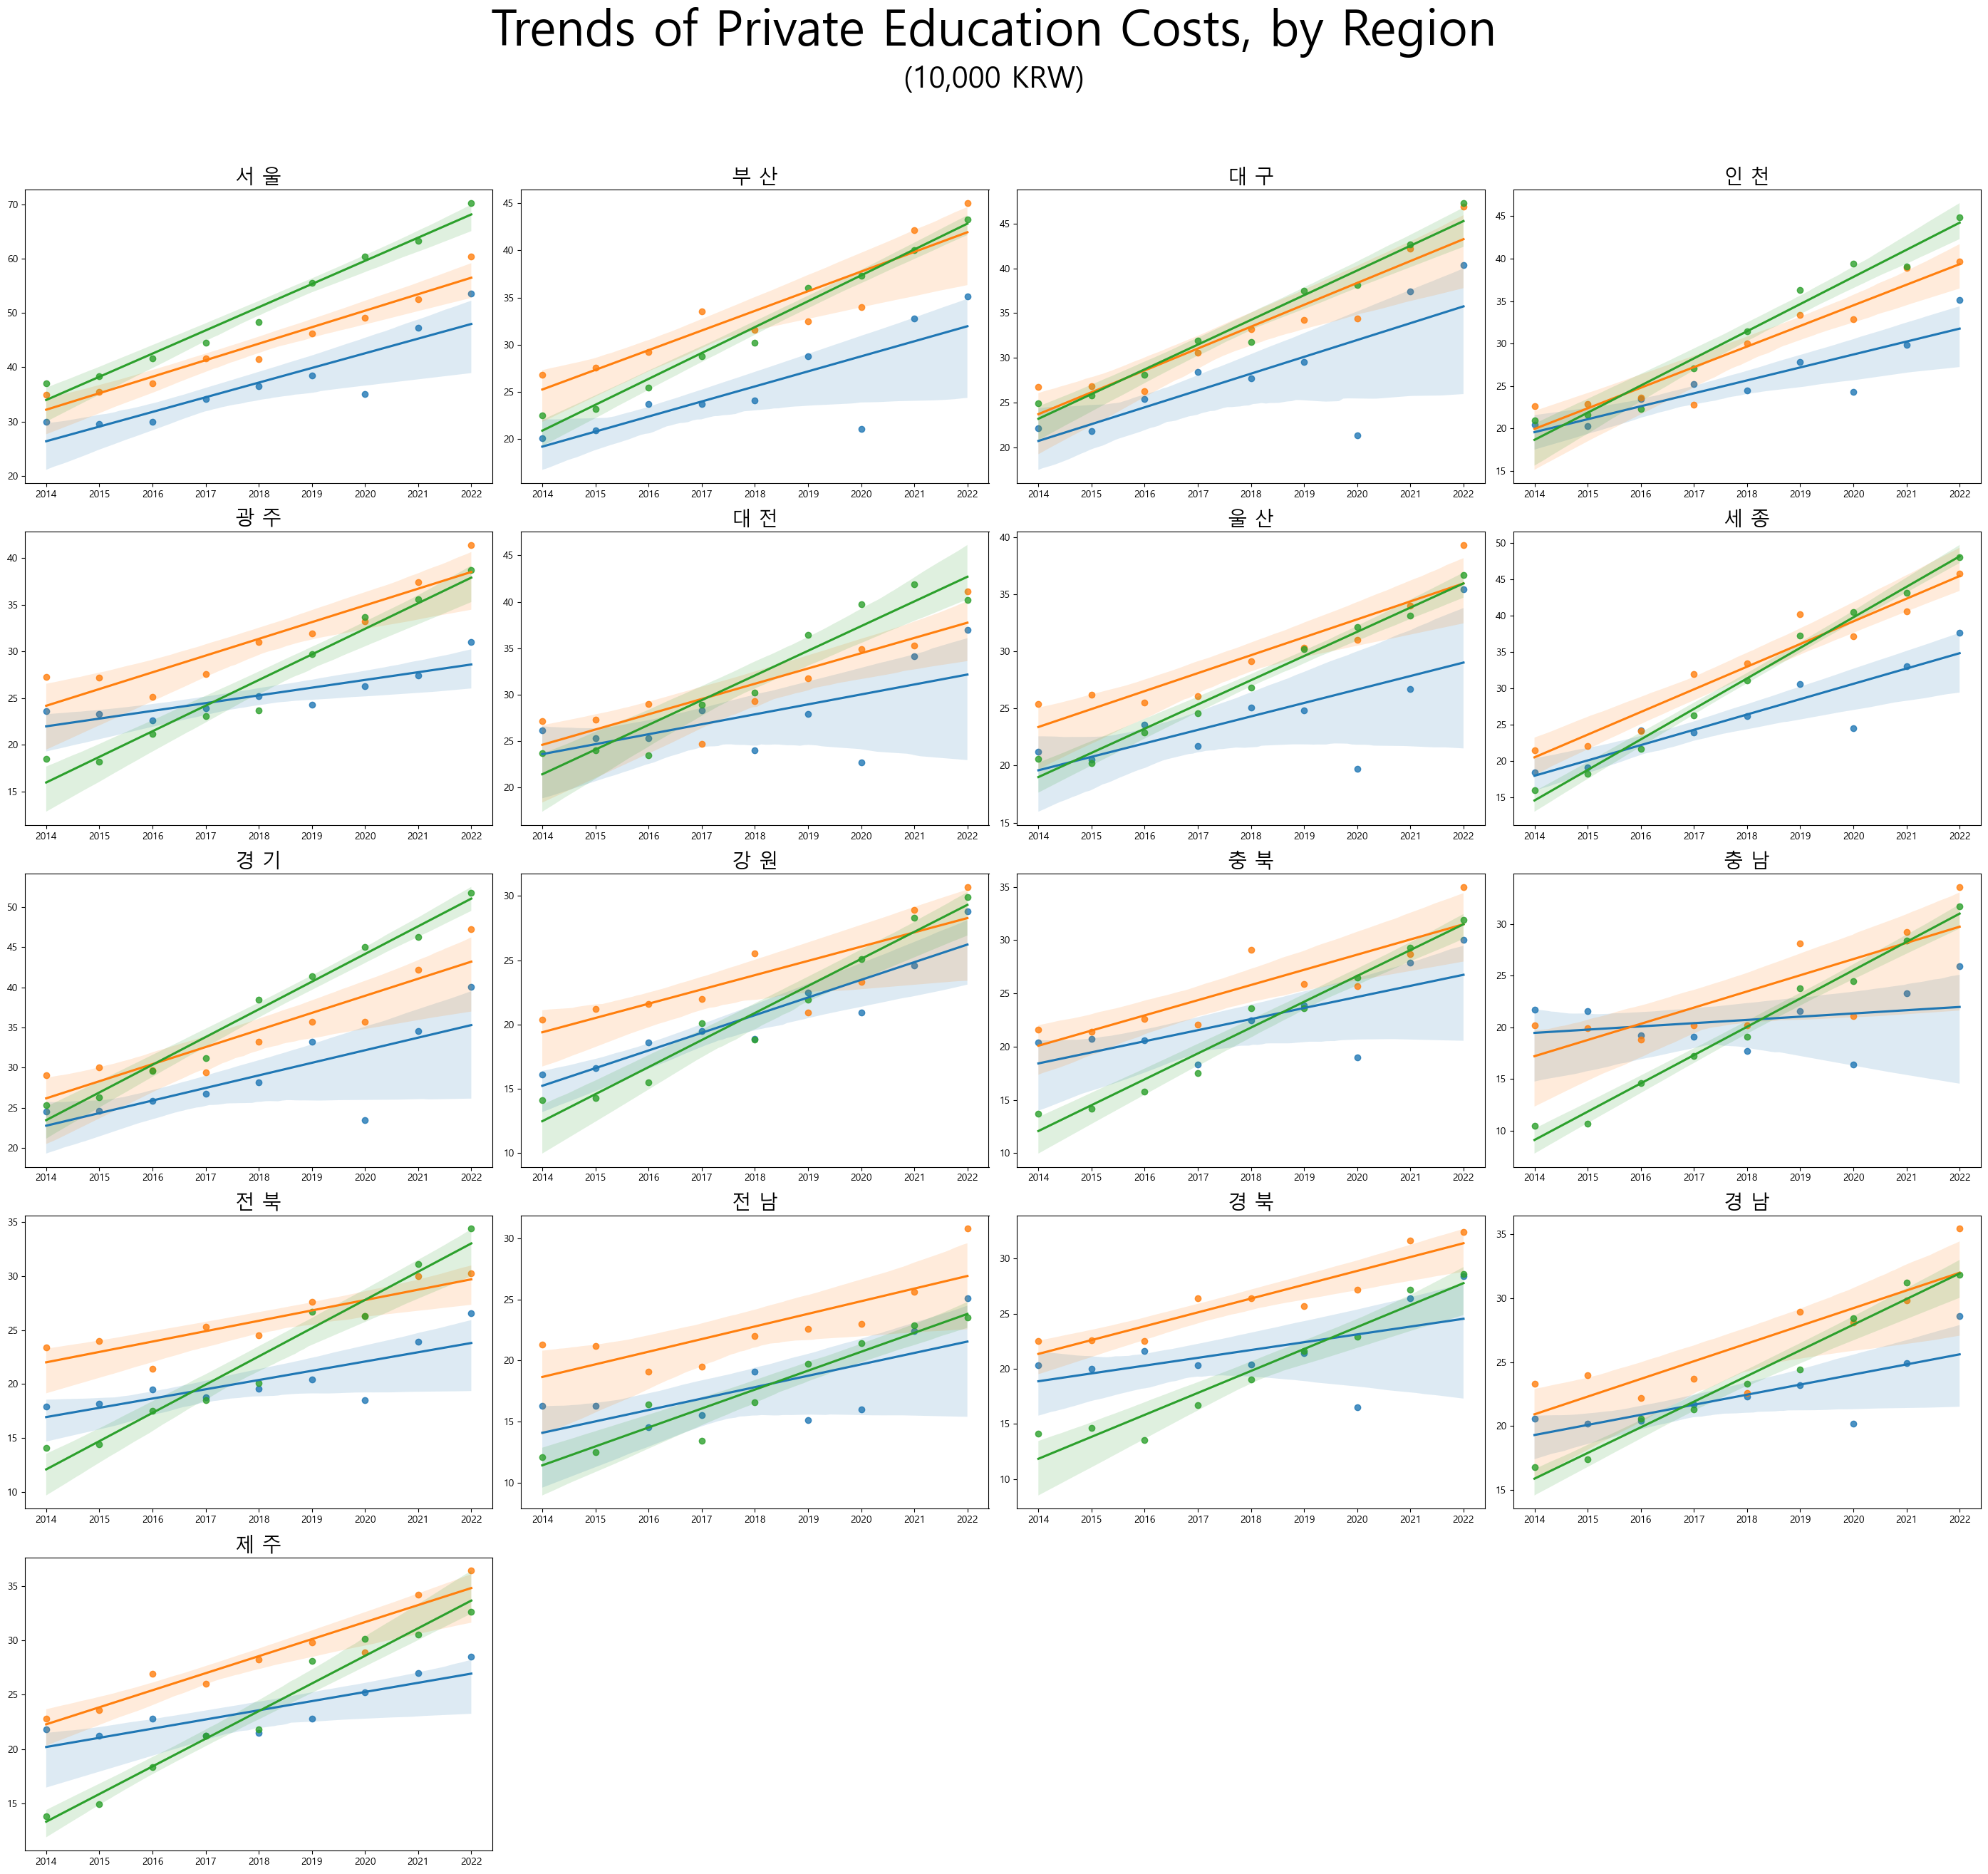

In [36]:
fig = plt.figure(figsize=(28,25))
for i, j in zip(range(len(in_e.columns)), in_e.columns):
    plt.subplot(5, 4, i+1)
    sns.regplot(x=in_e.index , y=in_e[j])
    sns.regplot(x=in_m.index , y=in_m[j])
    sns.regplot(x=in_h.index , y=in_h[j])
    plt.ylabel('')
    plt.title(j, fontsize=20)
fig.suptitle("Yearly Trends of Private Education Costs, by Region", fontsize=50, position=(0.5, 1.05))
fig.text(0.5, 1.005, "(10,000 KRW)", horizontalalignment="center", fontsize=30)
fig.tight_layout()
plt.show()

지역별 학생 1인당 월 평균 사교육비 (일반교과)

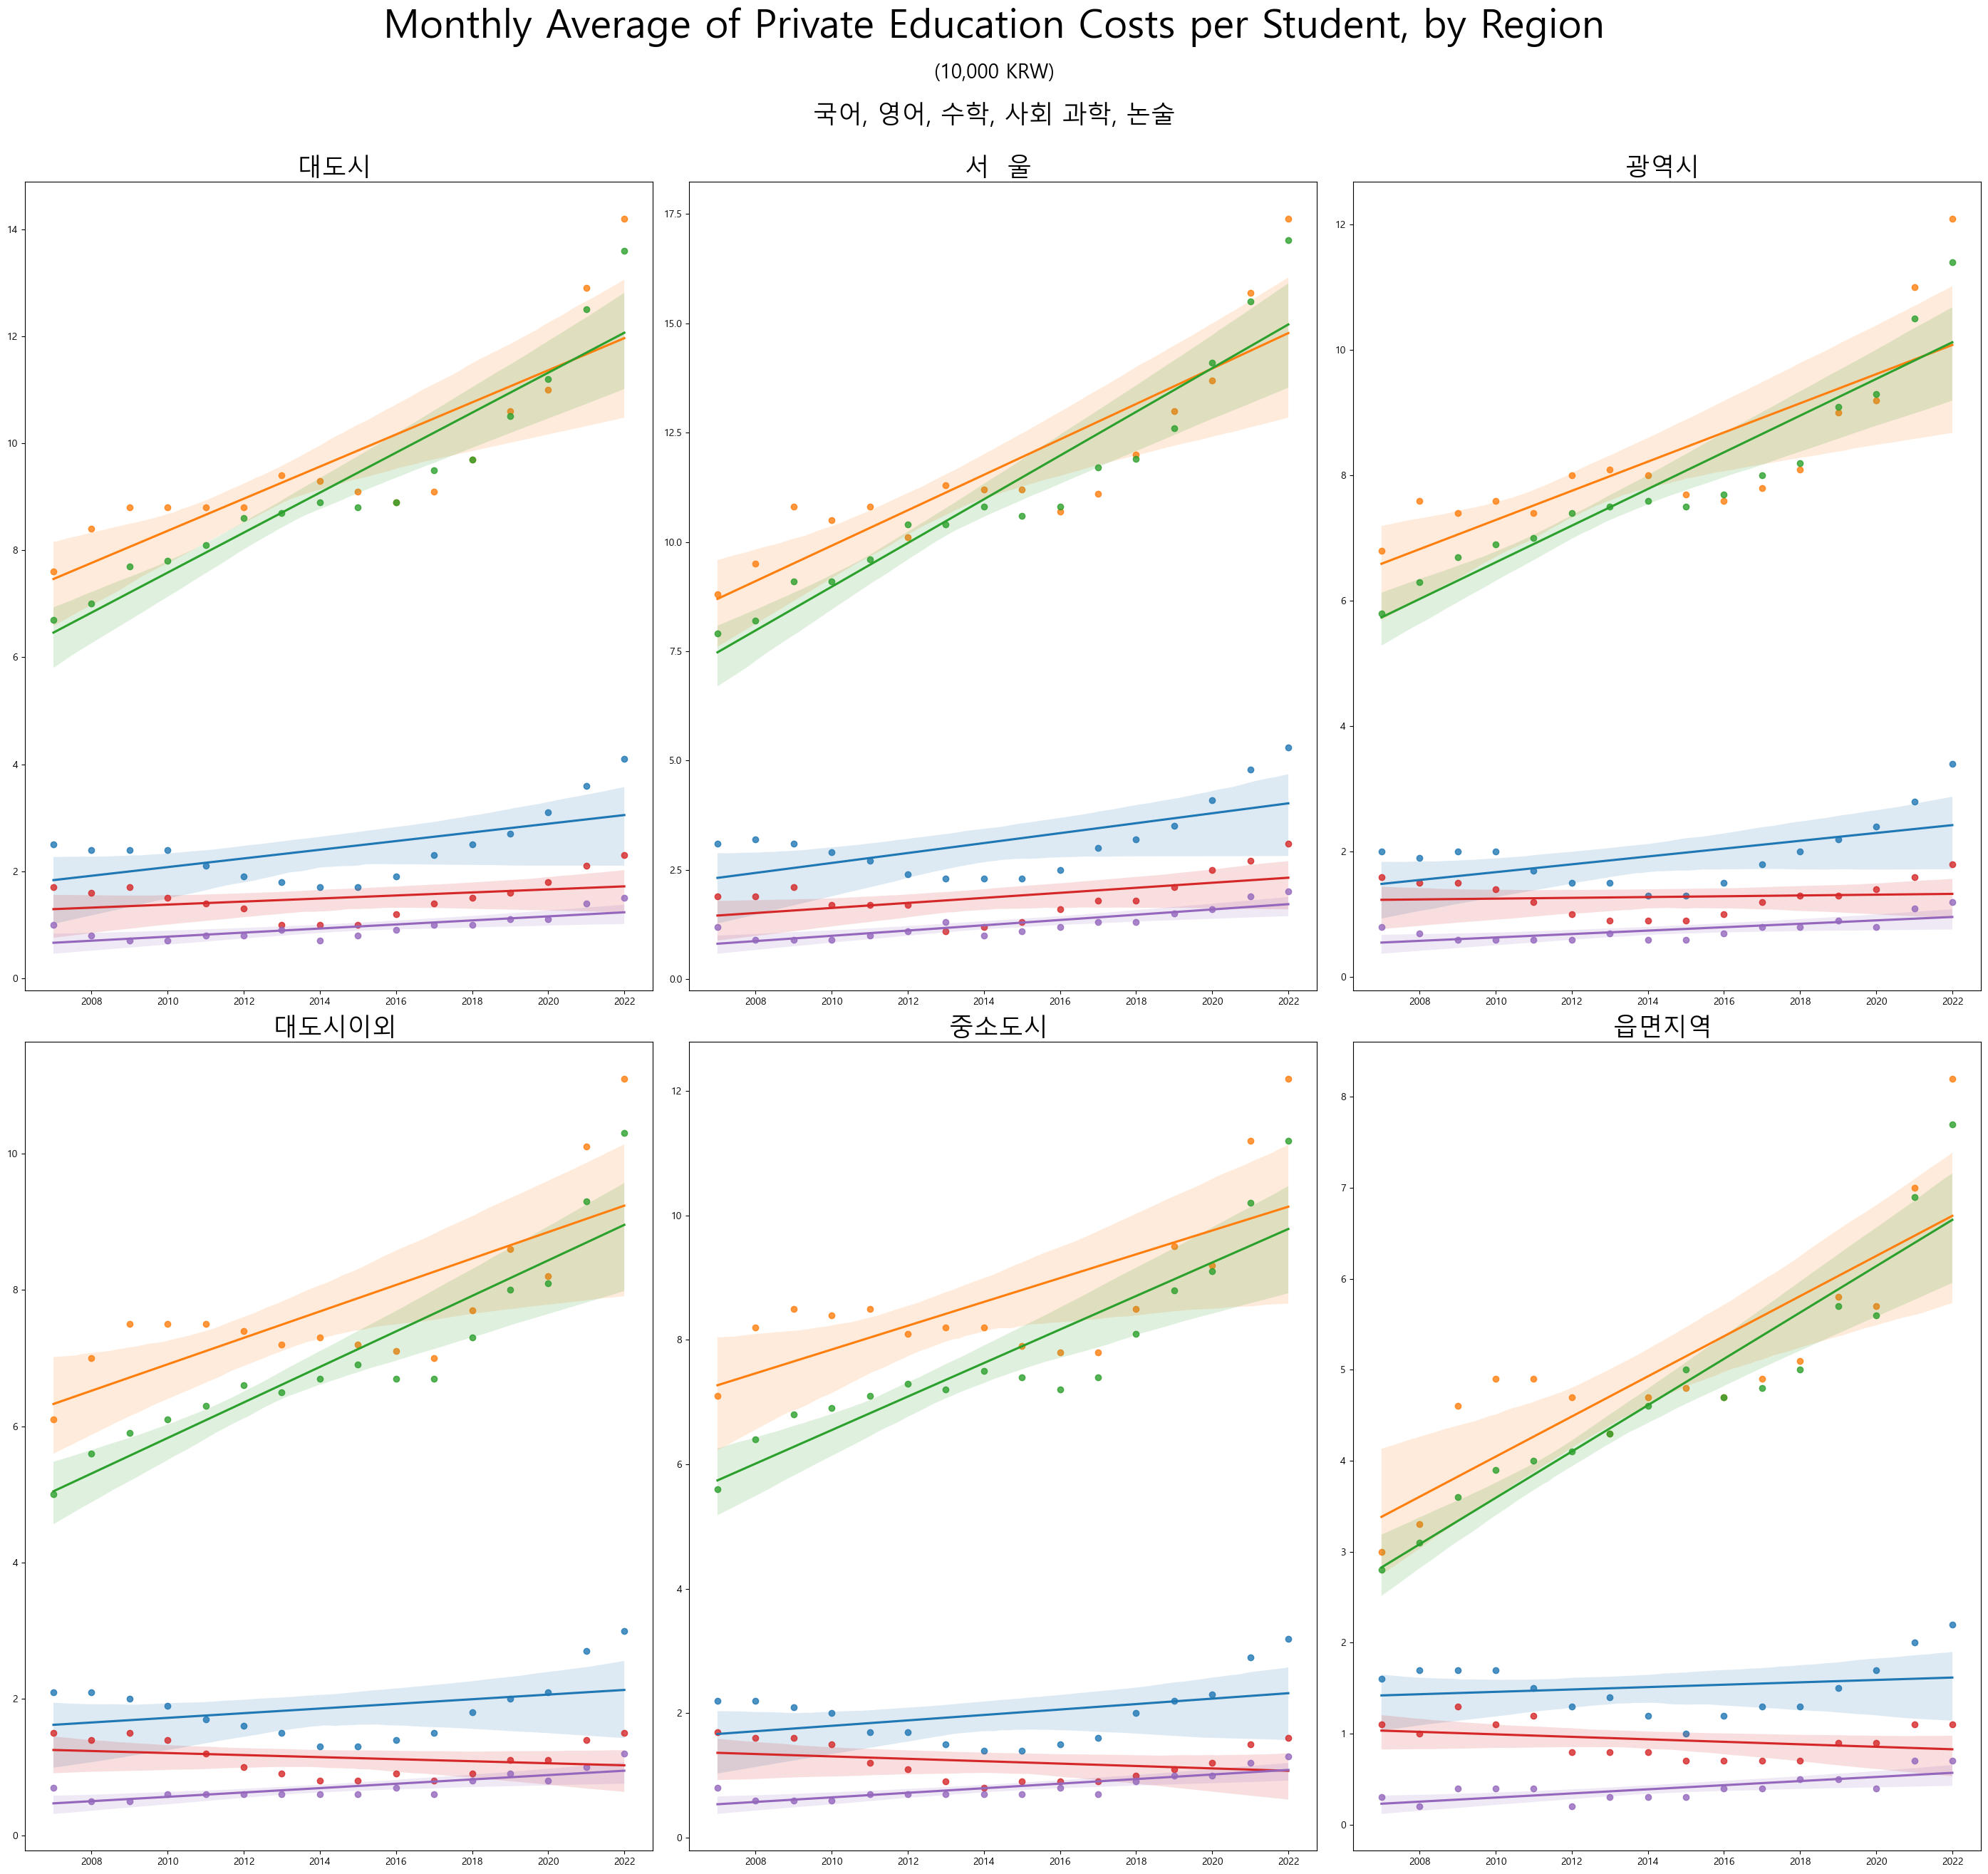

In [123]:
fig = plt.figure(figsize=(28,25))
for i, j in zip(range(len(kor.columns)), kor.columns):
    plt.subplot(2, 3, i+1)
    sns.regplot(x=kor.index , y=kor[j])
    sns.regplot(x=en.index , y=en[j])
    sns.regplot(x=math.index , y=math[j])
    sns.regplot(x=sosc.index , y=sosc[j])
    sns.regplot(x=essay.index , y=essay[j])
    plt.ylabel('')
    plt.title(j, fontsize=25)
fig.suptitle("Monthly Average of Private Education Costs per Student, by Region", fontsize=40, position=(0.5, 1.05))
fig.text(0.5, 1.01, "(10,000 KRW)", horizontalalignment="center", fontsize=20)
fig.text(0.5, 0.985, "국어, 영어, 수학, 사회 과학, 논술", horizontalalignment="center", fontsize=25)
fig.tight_layout()
plt.show()

지역별 학생 1인당 월 평균 사교육비 (학습 방법)

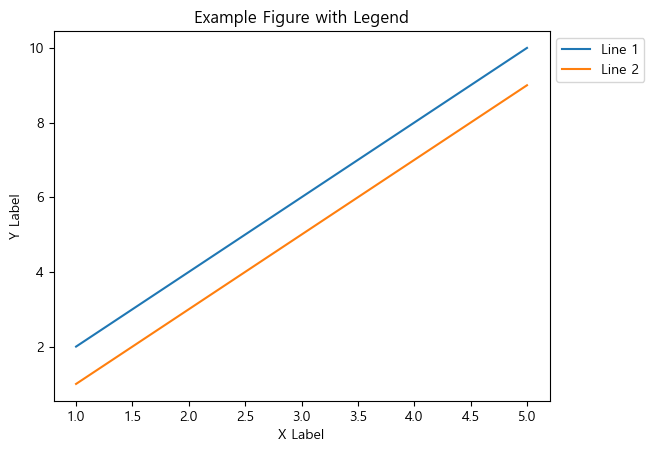

In [124]:
import matplotlib.pyplot as plt

# Create some data
x = [1, 2, 3, 4, 5]
y1 = [2, 4, 6, 8, 10]
y2 = [1, 3, 5, 7, 9]

# Create a figure and subplots
fig, ax1 = plt.subplots()

# Plot the data on the subplots
ax1.plot(x, y1, label='Line 1')
ax1.plot(x, y2, label='Line 2')

# Create a legend outside the subplots
legend = ax1.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Add a title and labels to the axes
ax1.set_title('Example Figure with Legend')
ax1.set_xlabel('X Label')
ax1.set_ylabel('Y Label')

# Show the plot
plt.show()

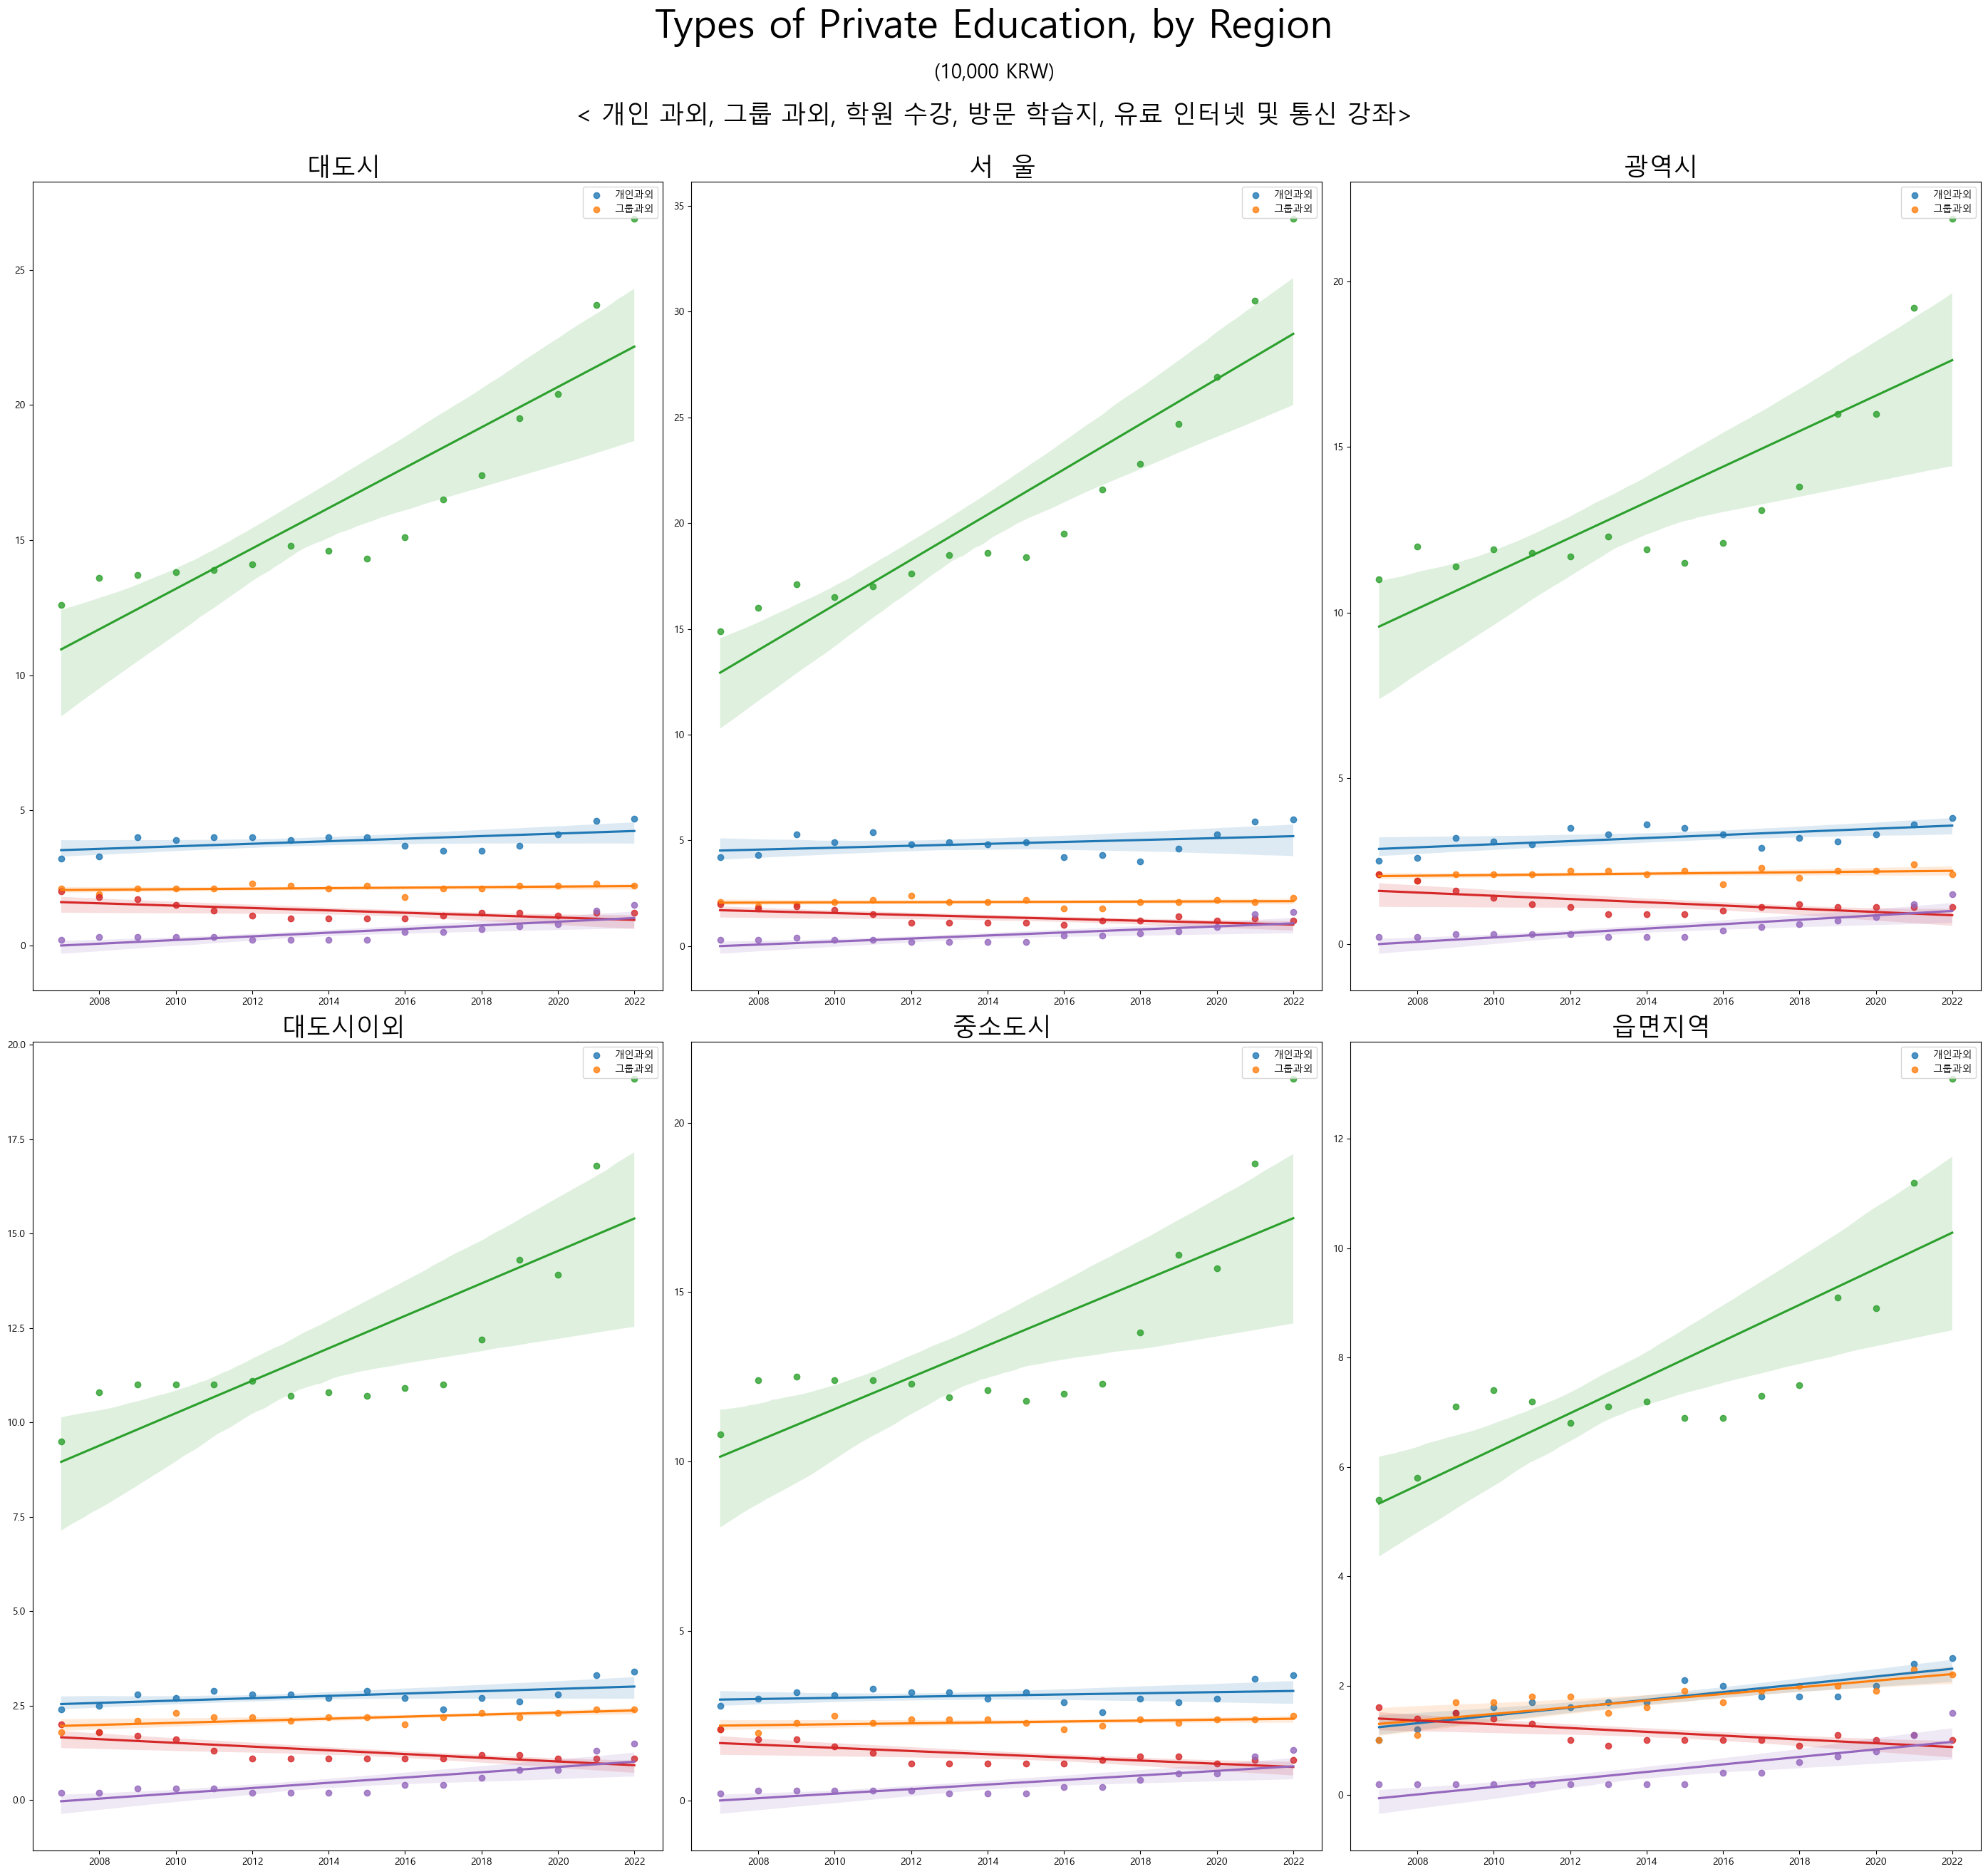

In [134]:
fig = plt.figure(figsize=(28,25))
for i, j in zip(range(len(kor.columns)), kor.columns):
    plt.subplot(2, 3, i+1)
    sns.regplot(x=indi.index , y=indi[j], label='개인과외')   # blue
    sns.regplot(x=gro.index , y=gro[j], label='그룹과외')     # orange
    sns.regplot(x=aca.index , y=aca[j])     # green
    sns.regplot(x=visi.index , y=visi[j])   # red
    sns.regplot(x=inter.index , y=inter[j]) # purple
    plt.ylabel('')
    plt.legend()
    plt.title(j, fontsize=25)
fig.suptitle("Types of Private Education, by Region", fontsize=40, position=(0.5, 1.05))
fig.text(0.5, 1.01, "(10,000 KRW)", horizontalalignment="center", fontsize=20)
fig.text(0.5, 0.985, "< 개인 과외, 그룹 과외, 학원 수강, 방문 학습지, 유료 인터넷 및 통신 강좌>", horizontalalignment="center", fontsize=25)
fig.tight_layout()
plt.show()

## Scatter 3D

# Modeling

## Linear Regression